In [ ]:
'''
This script tests the import and conversion of a 1) geotiff and 2) masking tif into an array , then the isolation
of band-48 (VIIRS), the application of the mask, and the calculations of the village's 'Percent Electrified'
and 'Lights at Night' values that is the mean radiance for the village.

To make sure this would run on multiple images, the script is then run on 8 images.
'''

In [16]:
import gdal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

VIIRS_IMAGE = "VIIRS_Bihar(vil)-Hill Block-243488.tif"
MASK_IMAGE = "MASK_Bihar(vil)-Hill Block-243488.tif"

min: 0.0213383
max: 3.11945
viirs: [[ 0.9211551   0.9211551   0.46709347  0.46709347  0.46709347  0.46709347
   0.46709347  0.46709347  0.46709347  0.46709347  0.46709347  0.46709347
   0.46709347  0.46709347  0.46709347  0.46709347  0.46709347  0.32264999
   0.32264999  0.32264999  0.32264999  0.32264999  0.32264999  0.32264999
   0.32264999  0.32264999  0.32264999  0.32264999  0.32264999  0.32264999
   0.32264999  0.32264999  0.32264999  0.29740924  0.29740924  0.29740924
   0.29740924  0.29740924  0.29740924  0.29740924  0.29740924  0.29740924
   0.29740924  0.29740924  0.29740924  0.29740924  0.29740924  0.29740924
   0.28254968  0.28254968  0.28254968  0.28254968  0.28254968  0.28254968
   0.28254968  0.28254968  0.28254968  0.28254968  0.28254968  0.28254968
   0.28254968  0.28254968  0.28254968  0.28254968  0.26498356  0.26498356
   0.26498356  0.26498356  0.26498356  0.26498356  0.26498356  0.26498356
   0.26498356  0.26498356  0.26498356  0.26498356  0.26498356  0.26498356
   

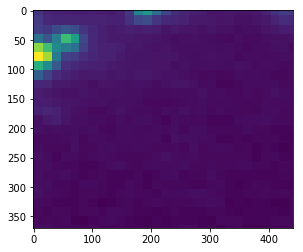

In [6]:
#read VIIRS data
#open file
try:
    tif = gdal.Open(VIIRS_IMAGE)
    tifArray = tif.ReadAsArray()
except:
    print('The file does not exist.')
    sys.exit(0)
    
#get band 48 (lights at night)
band48 = tif.GetRasterBand(48)
viirs = band48.ReadAsArray()

#shown: VIIRS nightlights array & image
print('min:', viirs.min())
print('max:', viirs.max())
print('viirs:', viirs[:1])
imgplot = plt.imshow(viirs)
plt.show()

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


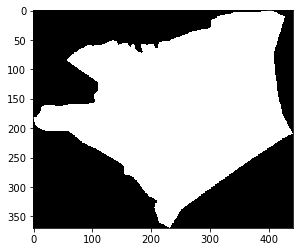

In [7]:
#read masked data
#shown: masked data array & image
#colors: 0 = black
#        255 = white
mask = plt.imread(MASK_IMAGE)
print(mask[:1])
imgplot2 = plt.imshow(mask)
plt.show()

In [8]:
#viirs dimensions: (370, 442)
#mask dimensions: (370, 442, 4) ?! What the heck...
print(viirs.shape)
print(mask.shape)

#looks like first 3 bands (aka columns) are always same, last band = 255
#let's use the first band for simplicity... aka mask[i][j][0]
print(mask[0][0])
print(mask[0][1])
print(mask[175][150])

(370, 442)
(370, 442, 4)
[  0   0   0 255]
[  0   0   0 255]
[255 255 255 255]


[[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1

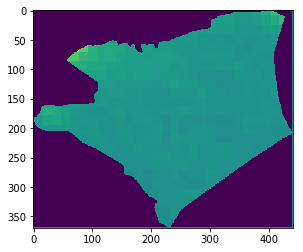

In [9]:
# on new array, if pixel masked then put -1, if pixel unmasked then put viirs data
# loop through every pixel looking for masked pixel (value = 0)
new = np.empty([viirs.shape[0],  viirs.shape[1]])
for i in range(mask.shape[0]-1):
    for j in range(mask.shape[1]-1):
        if (mask[i][j][0] == 0):
            new[i][j] = -1
        else:
            new[i][j] = viirs[i][j]
            
#it works!
print(new[:1])
imgplot3 = plt.imshow(new)
plt.show()

In [10]:
# okay, let's calculate out a single "lights at night" value
pixels = []
for i in range(new.shape[0]-1):
    for j in range(new.shape[1]-1):
        if (new[i][j] > -1):
            pixels.append(new[i][j])
# print out first 10 numbers of array to check... looks reasonable
print(pixels[:10])
# the repeats are okay to some extent because the VIIRS bands was likely resampled

# calculate the lights at night per unit area
# value looks reasonable
print('Lights at night per unit are:', np.mean(pixels))


[0.33237332105636597, 0.33237332105636597, 0.33237332105636597, 0.33237332105636597, 0.33237332105636597, 0.33237332105636597, 0.45773234963417053, 0.45773234963417053, 0.33237332105636597, 0.33237332105636597]
Lights at night per unit are: 0.139720575528


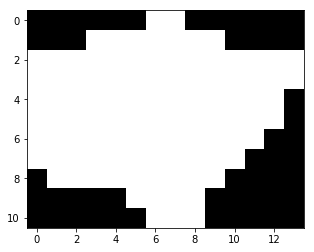

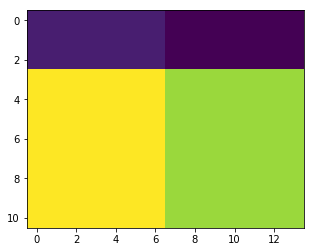

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.
   0.89780855  0.84486139 -1.         -1.         -1.         -1.         -1.
          nan]
 [-1.         -1.         -1.          0.89780855  0.89780855  0.89780855
   0.89780855  0.84486139  0.84486139  0.84486139 -1.         -1.         -1.
          nan]]
check min: nan
check max: nan


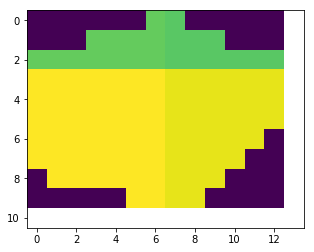

1.311


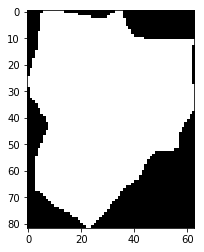

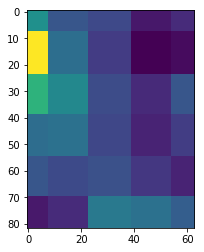

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.
   0.29305249  0.29305249  0.22068042  0.22068042  0.22068042  0.22068042
   0.22068042  0.22068042 -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
   0.20632616  0.20632616  0.20632616 -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.          0.        ]
 [-1.         -1.         -1.         -1.         -1.          0.29305249
   0.29305249  0.29305249  0.22068042  0.22068042  0.22068042  0.22068042
   0.22068042  0.22068042  0.22068042  0.22068042  0.22068042  0.22068042
   0.22068042 -1.         -1.         -1.       

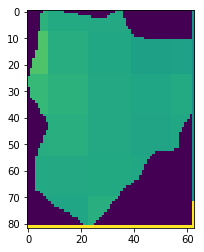

0.2183


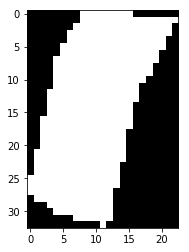

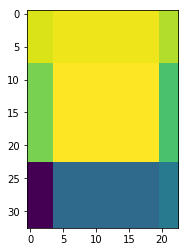

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.          0.54257482  0.54257482  0.54257482  0.54257482  0.54257482
   0.54257482  0.54257482  0.54257482 -1.         -1.         -1.         -1.
  -1.         -1.          1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.          0.54257482  0.54257482  0.54257482  0.54257482  0.54257482
   0.54257482  0.54257482  0.54257482  0.54257482  0.54257482  0.54257482
   0.54257482  0.52191949  0.52191949  1.        ]]
check min: -1.0
check max: 1.0


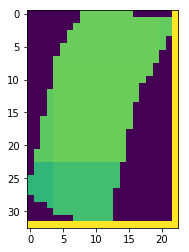

0.503136


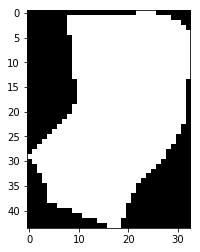

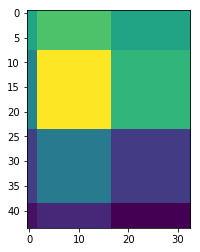

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.          0.6644882   0.6644882   0.6644882   0.6644882  -1.         -1.
  -1.         -1.         -1.         -1.          1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.          0.75015938  0.75015938  0.75015938  0.75015938  0.75015938
   0.75015938  0.75015938  0.75015938  0.75015938  0.6644882   0.6644882
   0.6644882   0.6644882   0.6644882   0.6644882   0.6644882   0.6644882
   0.6644882   0.6644882   0.6644882   0.6644882  -1.         -1.         -1.
   1.        ]]
check min: -1.0
check max: 1.0


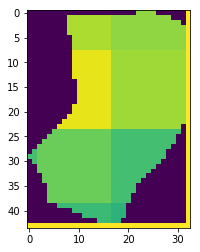

0.641468


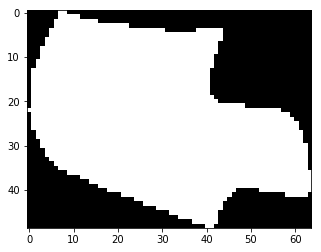

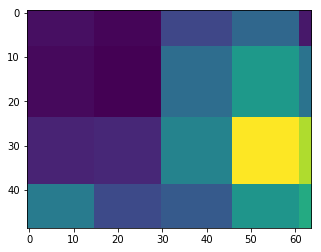

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
   1.35701048  1.35701048 -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
   1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
   1.35701048  1.35701048  1.35701048  1.35701048  1.35701048 -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.   

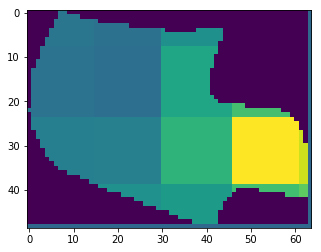

2.30711


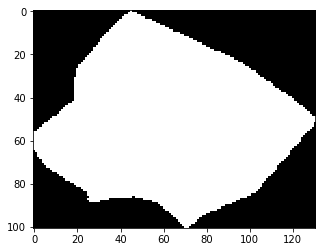

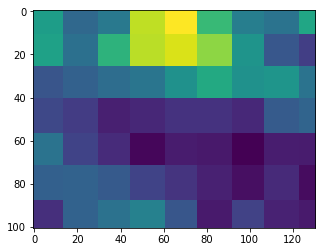

check new first: [[ -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000   5.00482798e-001  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  -1.00000000e+000  -1.00000000e+000  -1.00000000e+000
   -1.00000000e+000  

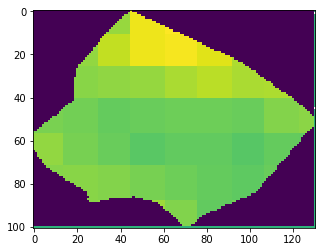

0.257431


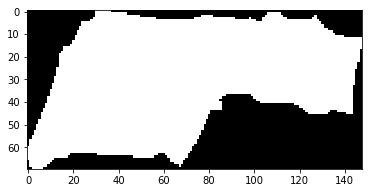

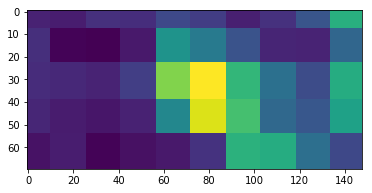

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.          0.21941698  0.21941698  0.21941698  0.21941698
   0.21941698  0.21941698  0.21941698 -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -

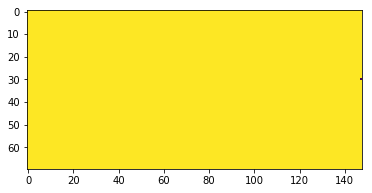

0.28462


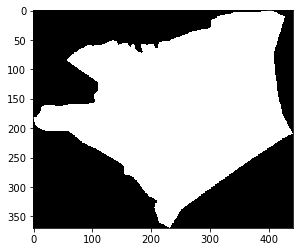

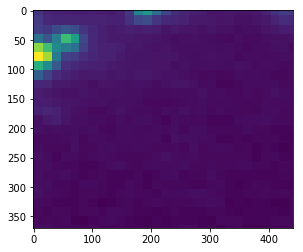

check new first: [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.      

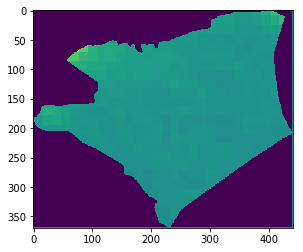

0.139721
Dictionary of village to nightlights per unit area {'Bihar(vil)-Hill Block-243488.tif': 0.13972057, 'Bihar(vil)-Dewriya-216061.tif': 0.21830028, 'Bihar(vil)-Imli-238576.tif': 0.25743076, 'Bihar(vil)-Karar-241262.tif': 0.64146817, 'Bihar(vil)-Aadharpur-227831.tif': 0.28461993, 'Bihar(vil)-Kuran-250270.tif': 0.5031364, 'Bihar(vil)-Bakra-245125.tif': 2.3071074, 'Bihar(vil)-Badh Marauna-227021.tif': 1.3110029}
Calculated number for Hill Block is the same for both methods...verified!


In [14]:
# lets now play around with iterating through multiple images, and copying result to the dataframe
VIIRS_IMAGE_PATH = "./imagery_res30_48bands/"
MASK_IMAGE_PATH = "./masks_res30/"
dict = {}

for file in os.listdir(MASK_IMAGE_PATH):
    binaryData = plt.imread(MASK_IMAGE_PATH + file)
    imgplot1 = plt.imshow(binaryData)
    plt.show()
    viirsGdal = gdal.Open(VIIRS_IMAGE_PATH + file)
    band48 = viirsGdal.GetRasterBand(48)
    viirsData = band48.ReadAsArray()
    imgplot2 = plt.imshow(viirsData)
    plt.show()
    
###can generate overlayed mask + viirs here (has errors right now! 10^307!)
    new = np.empty([viirsData.shape[0],  viirsData.shape[1]])
    for i in range(viirsData.shape[0]-1):
        for j in range(viirsData.shape[1]-1):
            if (binaryData[i][j][0] == 0):
                new[i][j] = -1
            else:
                new[i][j] = viirsData[i][j]
    print('check new first:', new[:2])
    print('check min:', new.min())
    print('check max:', new.max())
    imgplot4 = plt.imshow(new)
    plt.show()
    
    #but all we actually need is the math...
    array = []
    sum = 0
    count = 0
    new = np.empty([viirsData.shape[0],  viirsData.shape[1]])
    for i in range(viirsData.shape[0]-1):
        for j in range(viirsData.shape[1]-1):
            if (binaryData[i][j][0] == 255):
                array.append(viirsData[i][j])
                sum += viirsData[i][j]
                count += 1
    print(np.mean(array))
    dict[file] = np.mean(array)

print("Dictionary of village to nightlights per unit area", dict)
print("Calculated number for Hill Block is the same for both methods...verified!")

In [12]:
# let's throw the data in the dataframe

# replace -9 with NaN
# calculate percent electrified
# empty column for lights at night data
df = pd.read_csv('garv_data_bihar-3.csv')
df = df.replace(-9, np.nan) 
df['Census 2011 ID'] = df['Census 2011 ID'].astype(str)
df['Percentage Electrified'] = (df['Number of Electrified Households']/df['Number of Households'])*100
df['Lights at Night'] = np.nan
df.head()

# match dictionary key (ID) with census ID 
# add into dataframe
for key in dict:
    id = key.split('-')[2].split('.')[0]
    print ('id:', id)
    immed = (df['Census 2011 ID'].astype(str) == id)
    df.loc[immed, 'Lights at Night'] = float(dict[key])
# if df['Number of Electrified Households'].item != np.nan:
#     df.loc[immed, 'Lights at Night'] = float(dict[key])
# else:
#     df.loc[immed, 'Lights at Night'] = np.nan    
    
#final dataframe
df.head()

id: 243488
id: 216061
id: 238576
id: 241262
id: 227831
id: 250270
id: 245125
id: 227021


,Census 2011 ID,Village Name,District Name,State Name,Number of Households,Number of Electrified Households,Percentage Electrified,Lights at Night
0,227831,Aadharpur,Darbhanga,Bihar,889.0,203.0,22.834646,0.284620
1,227021,Badh Marauna,Darbhanga,Bihar,168.0,147.0,87.500000,1.311003
2,243488,Hill Block,Lakhisarai,Bihar,NaN,NaN,NaN,0.139721
